<a href="https://colab.research.google.com/github/Abiola97/ajaoabiola0812/blob/main/Exp_method(Lab_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simple Difference**

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5



	Welch Two Sample t-test

data:  ToothGrowth$len[ToothGrowth$supp == "OJ"] and ToothGrowth$len[ToothGrowth$supp == "VC"]
t = 1.9153, df = 55.309, p-value = 0.06063
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1710156  7.5710156
sample estimates:
mean of x mean of y 
 20.66333  16.96333 


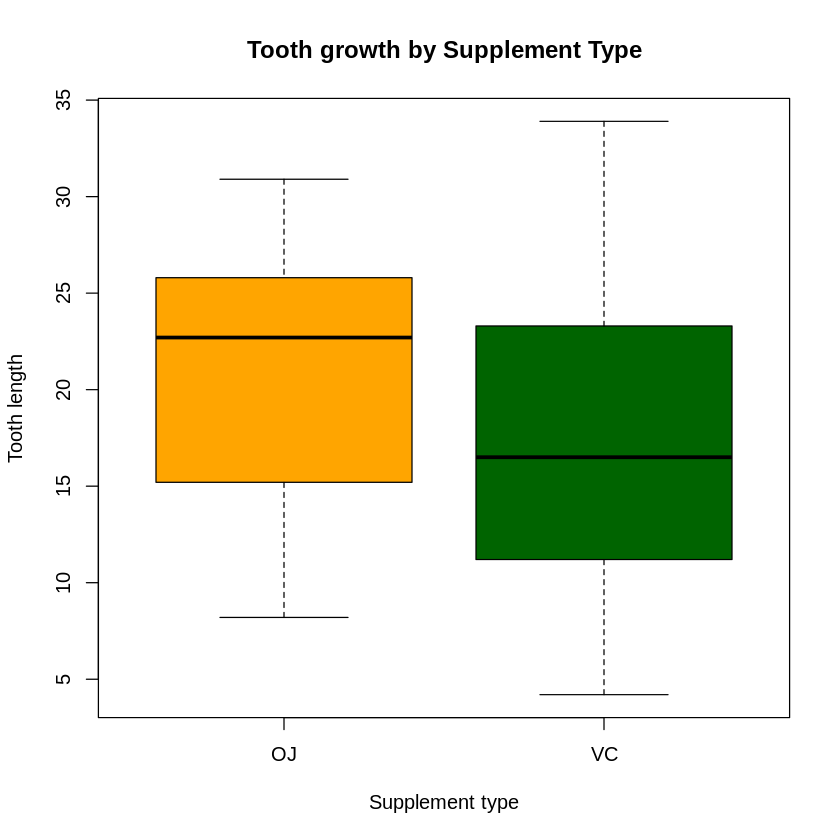

In [ ]:
#load and view data ToothGrowth
data(ToothGrowth)
?ToothGrowth
head(ToothGrowth)
#compare tooth length between two supplement types
t.test(ToothGrowth$len[ToothGrowth$supp == 'OJ'],
       ToothGrowth$len[ToothGrowth$supp == 'VC'])
#Visualize
boxplot(len ~ supp, data = ToothGrowth,  #Corrected dataframe name
        col = c("orange", "darkgreen"),
        main = "Tooth growth by Supplement Type", #Added missing comma
        xlab = "Supplement type", ylab = "Tooth length")  #Added missing comma

MULTIVARIATE REGRESSION WITH CONTROLS

In [ ]:
#Load mtcars datatset
data(mtcars)
?mtcars
head(mtcars)

#simple model; mpg ~ weight
simple_model <- lm(mpg ~ wt , data = mtcars)

#control model; mpg ~ weight
control_model <- lm(mpg ~ wt + cyl, data = mtcars)

#compare the models
summary(simple_model)
summary(control_model)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1



Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10



Call:
lm(formula = mpg ~ wt + cyl, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2893 -1.5512 -0.4684  1.5743  6.1004 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.6863     1.7150  23.141  < 2e-16 ***
wt           -3.1910     0.7569  -4.216 0.000222 ***
cyl          -1.5078     0.4147  -3.636 0.001064 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.568 on 29 degrees of freedom
Multiple R-squared:  0.8302,	Adjusted R-squared:  0.8185 
F-statistic: 70.91 on 2 and 29 DF,  p-value: 6.809e-12


**DIFFERENCE-IN-DIFFERENCE**

In [ ]:
#Create time and treatment variables
ToothGrowth$time <- ifelse(ToothGrowth$dose < 1, "before", "after")
ToothGrowth$treatment <- ifelse(ToothGrowth$supp == "OJ", 1, 0)
#Create interaction term for difference-in-difference
ToothGrowth$did <- ToothGrowth$treatment * (ToothGrowth$time == 'after')
#Run the model
did_model <- lm(len ~ time + treatment + did, data = ToothGrowth)
summary(did_model)


Call:
lm(formula = len ~ time + treatment + did, data = ToothGrowth)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8800 -3.5300  0.0825  2.9200 12.4450 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   21.455      1.038  20.663  < 2e-16 ***
timebefore   -13.475      1.798  -7.492 5.31e-10 ***
treatment      5.250      2.077   2.528   0.0143 *  
did           -2.325      2.543  -0.914   0.3646    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.644 on 56 degrees of freedom
Multiple R-squared:  0.6502,	Adjusted R-squared:  0.6315 
F-statistic:  34.7 on 3 and 56 DF,  p-value: 8.295e-13
